<a href="https://colab.research.google.com/github/catarinatomasr/Project_DLNN_Group17/blob/main/C%C3%B3pia_de_Projecto_DNLL_draft_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential, Model, Input, layers, initializers, regularizers, optimizers, metrics 

import os
import time
import random 
import zipfile
from zipfile import ZipFile as zip

from shutil import copyfile

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap

#from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, f1_score, r2_score, accuracy_score
from sklearn.datasets import make_circles

In [ ]:
from google.colab import drive


# Mount GDrive into your session
drive.mount('/content/drive')
# Setup connection string towards your folder
path_test = "/content/drive/MyDrive/DLNN/one-shot-pokemon/"
t0 = time.time()

path_train = "/content/drive/MyDrive/DLNN/generation-one/"
t1 = time.time()

#Pokemon-a

# Transfer zip dataset to the current virtual machine
copyfile (path_test + 'pokemon-b.zip','pokemon-b.zip')
# Extract files
zip = zipfile.ZipFile('pokemon-b.zip')
zip.extractall()
zip.close()
print("File transfer completed in %0.3f seconds" % (time.time() - t0))


#Pokemon-tcg-images

# Transfer zip dataset to the current virtual machine
copyfile (path_test + 'pokemon-tcg-images.zip','pokemon-tcg-images.zip')
# Extract files
zip = zipfile.ZipFile('pokemon-tcg-images.zip')
zip.extractall()
zip.close()
print("File transfer completed in %0.3f seconds" % (time.time() - t0))

#Pokemon generation one

# Transfer zip dataset to the current virtual machine
copyfile (path_train + 'generation-one.zip','generation-one.zip')
# Extract files
zip = zipfile.ZipFile('generation-one.zip')
zip.extractall()
zip.close()
print("File transfer completed in %0.3f seconds" % (time.time() - t1))



path = "/content/"
#main_folder, training_folder, testing_folder = "pokemon/", "training_set/", "test_set/"


Mounted at /content/drive
File transfer completed in 5.252 seconds
File transfer completed in 16.830 seconds
File transfer completed in 56.058 seconds


#Precisamos separar os dados de teste e de treino dos nossos datasets antes de correr os códigos

In [ ]:

main_folder, training_folder, testing_folder2 = "/content/", "dataset/", "pokemon-tcg-images/"

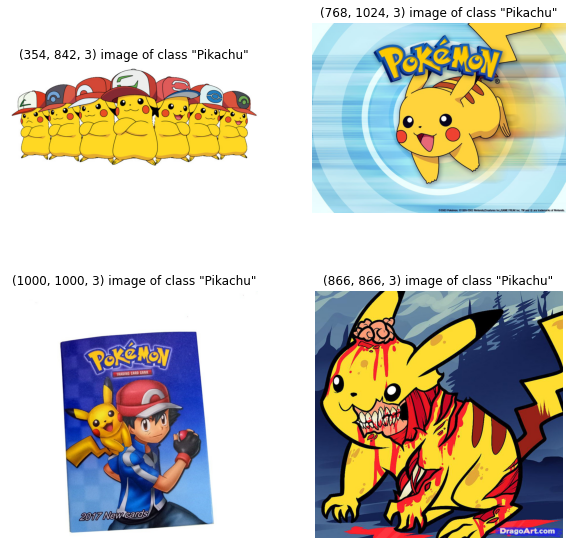

In [ ]:
def show_sample_images(folder_directory, class_):
    # Build a connection string
    full_path = folder_directory + class_ + "/"
    # Get a set of random images
    images = random.sample(os.listdir(full_path), 4)
    # Plot the images
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(images):
        img = mpimg.imread(full_path + img)
        ax = plt.subplot(2, 2,  i + 1)
        plt.imshow(img)
        plt.title("{} image of class \"{}\"".format(img.shape, class_))
        plt.axis("off")

show_sample_images(main_folder + training_folder, 'Pikachu')

## Copiei o código da aula 3. Ficheiro t_w3

In [ ]:
tf.keras.backend.image_data_format()

'channels_last'

In [ ]:
classes=os.listdir(main_folder + training_folder)

In [ ]:
image_size=(128, 128)
crop_to_aspect_ratio = True
color_mode='rgb'
batch_size=64
label_mode="categorical"
labels = 'inferred'
validation_split=0.2
shuffle=True
seed=0

In [ ]:
# Generate an object of type tf.data.Dataset for training data
ds_train = image_dataset_from_directory(main_folder + training_folder, 
                                        image_size=image_size,
                                        crop_to_aspect_ratio=crop_to_aspect_ratio,
                                        color_mode=color_mode,
                                        batch_size=batch_size,
                                        labels=labels,
                                        label_mode=label_mode,
                                        subset='training',
                                        validation_split=validation_split, 
                                        shuffle=shuffle,
                                        seed=seed)
# Generate an object of type tf.data.Dataset for validation data
ds_val = image_dataset_from_directory(main_folder + training_folder, 
                                      image_size=image_size,
                                      crop_to_aspect_ratio=crop_to_aspect_ratio,
                                      color_mode=color_mode,
                                      batch_size=batch_size,
                                      labels=labels,
                                      label_mode=label_mode,
                                      subset='validation',
                                      validation_split=validation_split, 
                                      shuffle=shuffle,
                                      seed=seed)

# Check object properties
print("\nObject's type:\t", type(ds_train))
print("Is it a tf.data.Dataset?\t R:",isinstance(ds_train, tf.data.Dataset))
print("Classes:", ds_train.class_names)

Found 21316 files belonging to 150 classes.
Using 17053 files for training.
Found 21316 files belonging to 150 classes.
Using 4263 files for validation.

Object's type:	 <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
Is it a tf.data.Dataset?	 R: True
Classes: ['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kaku

In [ ]:
iter_train = iter(ds_train)
batch_x_train, batch_y_train = iter_train.next()
print(batch_x_train.shape, batch_y_train.shape)
print("\nSample of x_train:", batch_x_train[0:5])
print("\nSample of y_train:", batch_y_train[0:5])
print("Sample average of y_train:", tf.reduce_mean(batch_y_train))

(64, 128, 128, 3) (64, 150)

Sample of x_train: tf.Tensor(
[[[[ 78.65234    66.65234    88.65234  ]
   [ 78.28125    66.28125    88.28125  ]
   [ 77.228516   65.228516   87.228516 ]
   ...
   [ 83.28125    72.28125    89.28125  ]
   [ 84.237305   73.237305   90.237305 ]
   [ 81.28125    70.28125    87.28125  ]]

  [[ 76.237305   64.237305   86.237305 ]
   [ 77.649414   65.649414   87.649414 ]
   [ 79.875      67.875      89.875    ]
   ...
   [ 82.59375    71.59375    88.59375  ]
   [ 81.         70.         87.       ]
   [ 78.325195   67.325195   84.325195 ]]

  [[ 77.64551    66.64551    83.64551  ]
   [ 81.65527    69.65527    91.65527  ]
   [ 81.58496    69.58496    91.58496  ]
   ...
   [ 82.         71.         88.       ]
   [ 80.15625    69.15625    86.15625  ]
   [ 80.17578    70.947266   87.947266 ]]

  ...

  [[ 36.8125     19.8125     38.8125   ]
   [ 37.907227   20.907227   39.907227 ]
   [ 35.40625    18.40625    37.40625  ]
   ...
   [ 28.         11.         30.       

In [ ]:
iter_val = iter(ds_val)
batch_x_val, batch_y_val = iter_val.next()
print(batch_x_val.shape, batch_y_val.shape)
print("\nSample of x_val:", batch_x_val[0:5])
print("\nSample of y_val:", batch_y_val[0:5])
print("Sample average of y_val:", tf.reduce_mean(batch_y_val))

(64, 128, 128, 3) (64, 150)

Sample of x_val: tf.Tensor(
[[[[ 30.        31.        26.      ]
   [ 30.        31.        26.      ]
   [ 30.        31.        26.      ]
   ...
   [112.       113.        97.      ]
   [112.       113.        97.      ]
   [112.       113.        97.      ]]

  [[ 30.        31.        26.      ]
   [ 30.        31.        26.      ]
   [ 30.        31.        26.      ]
   ...
   [112.       113.        97.      ]
   [112.       113.        97.      ]
   [112.       113.        97.      ]]

  [[ 30.        31.        26.      ]
   [ 30.        31.        26.      ]
   [ 30.        31.        26.      ]
   ...
   [112.       113.        97.      ]
   [112.       113.        97.      ]
   [112.       113.        97.      ]]

  ...

  [[134.       118.        95.      ]
   [134.       118.        95.      ]
   [134.       118.        95.      ]
   ...
   [143.       122.       101.      ]
   [143.       122.       101.      ]
   [143.       122.       10

In [ ]:
input_shape = batch_x_train.shape
# Architecture v1
cnn1 = Sequential([# Feature extraction
                   #layers.Input(input_shape[1:]),
                   layers.Conv2D(filters=32, kernel_size=(3, 3), # input_shape=input_shape[1:],
                                 kernel_initializer=initializers.GlorotNormal(seed=seed)),
                   layers.Activation("relu"),
                   layers.MaxPooling2D(pool_size=(2, 2)),
                   layers.Conv2D(filters=64, kernel_size=(3, 3),
                                 kernel_initializer=initializers.GlorotNormal(seed=seed)),
                   layers.Activation("relu"),
                   layers.GlobalMaxPooling2D(),
                   # Classification (use units=n_classes, activation="softmax" for multi-class problems)
                   layers.Dense(units=150, 
                                kernel_initializer=initializers.GlorotNormal(seed=seed))])
# Builds the DAG (comment if input_shape was already provided to the first layer)
cnn1.build(input_shape)
# Check network
cnn1.summary()  # alternatively use tf.keras.utils.plot_model(cnn1, show_shapes=True)
learning_rate = 0.001  # 0.001 <=> 1e-3
cnn1.compile(loss="CategoricalCrossentropy",
             optimizer='adam',  
             metrics=['accuracy'])
# Model training (v1)
epochs = 10
history1 = cnn1.fit(ds_train, epochs=epochs, validation_data=ds_val)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (64, 126, 126, 32)        896       
                                                                 
 activation_2 (Activation)   (64, 126, 126, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (64, 63, 63, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (64, 61, 61, 64)          18496     
                                                                 
 activation_3 (Activation)   (64, 61, 61, 64)          0         
                                                                 
 global_max_pooling2d_1 (Glo  (64, 64)                 0         
 balMaxPooling2D)                                     

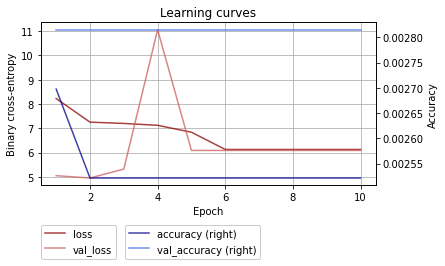

In [ ]:
#plot learning curves
# Create DataFrame object
df_hist1 = pd.DataFrame.from_dict(history1.history)
df_hist1["Epoch"] = np.arange(1, len(df_hist1) + 1, 1)
# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist1.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                   secondary_y = secondary_y,
                   kind="line", figsize=(6, 3), grid=True, legend=True,
                   ylabel="Binary cross-entropy", 
                   xlabel="Epoch", title="Learning curves",                  
                   color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

In [ ]:
input_shape = tuple(batch_x_train.shape)
# Architecture v2
cnn5 = Sequential([# The batch normalization layer 
                   layers.BatchNormalization(),                           
                   # Feature extraction
                   layers.Conv2D(filters=32, kernel_size=(3, 3),
                                 kernel_initializer=initializers.GlorotNormal(seed=seed)),
                   layers.BatchNormalization(),                           
                   layers.Activation("relu"),
                   layers.MaxPooling2D(pool_size=(2, 2)),
                   layers.Conv2D(filters=64, kernel_size=(3, 3),
                                 kernel_initializer=initializers.GlorotNormal(seed=seed)),
                   layers.BatchNormalization(),                           
                   layers.Activation("relu"),
                   layers.MaxPooling2D(pool_size=(2, 2)),
                   layers.Conv2D(filters=128, kernel_size=(3, 3),
                                 kernel_initializer=initializers.GlorotNormal(seed=seed)),
                   layers.BatchNormalization(),                           
                   layers.Activation("relu"),
                   layers.MaxPooling2D(pool_size=(2, 2)),
                   layers.Conv2D(filters=256, kernel_size=(3, 3),
                                 kernel_initializer=initializers.GlorotNormal(seed=seed)),
                   layers.BatchNormalization(),                           
                   layers.Activation("relu"),                   
                   layers.GlobalMaxPooling2D(),
                   # Classification (use units=n_classes, activation="softmax" for multi-class)
                   layers.Dense(units=150, activation="softmax",
                                kernel_initializer=initializers.GlorotNormal(seed=seed))])
# Builds the DAG (comment if input_shape was already provided to the first layer)
cnn5.build(input_shape)
# Check network
cnn5.summary()  # alternatively use tf.keras.utils.plot_model(cnn1, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (64, 128, 128, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (64, 126, 126, 32)        896       
                                                                 
 batch_normalization_1 (Batc  (64, 126, 126, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (64, 126, 126, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (64, 63, 63, 32)         0         
 2D)                                                             
                                                      

In [ ]:
# 1. 
cnn5.compile(loss="CategoricalCrossentropy",
             optimizer=optimizers.Adam(learning_rate=learning_rate),  
             metrics=[metrics.BinaryAccuracy(name='accuracy'),
                      metrics.AUC(name='AUROC')])




In [ ]:
# 2. 
epochs = 10
history5 = cnn5.fit(ds_train, epochs=epochs, validation_data=ds_val)

Epoch 1/10
267/267 [==============================] - 103s 374ms/step - loss: 3.0458 - accuracy: 0.9933 - AUROC: 0.8352 - val_loss: 2.7738 - val_accuracy: 0.9932 - val_AUROC: 0.8745
Epoch 2/10
267/267 [==============================] - 99s 362ms/step - loss: 2.5707 - accuracy: 0.9933 - AUROC: 0.9044 - val_loss: 2.6706 - val_accuracy: 0.9932 - val_AUROC: 0.8764
Epoch 3/10
267/267 [==============================] - 102s 375ms/step - loss: 2.3516 - accuracy: 0.9933 - AUROC: 0.9258 - val_loss: 2.5192 - val_accuracy: 0.9931 - val_AUROC: 0.9017
Epoch 4/10
267/267 [==============================] - 98s 361ms/step - loss: 2.1963 - accuracy: 0.9933 - AUROC: 0.9380 - val_loss: 2.4175 - val_accuracy: 0.9929 - val_AUROC: 0.9158
Epoch 5/10
267/267 [==============================] - 102s 374ms/step - loss: 2.0875 - accuracy: 0.9933 - AUROC: 0.9455 - val_loss: 2.3739 - val_accuracy: 0.9927 - val_AUROC: 0.9246
Epoch 6/10
267/267 [==============================] - 98s 361ms/step - loss: 1.9790 - accura

In [ ]:
# 3. 
df_hist5 = pd.DataFrame.from_dict(history5.history)
df_hist5["Epoch"] = np.arange(1, len(df_hist5) + 1, 1)

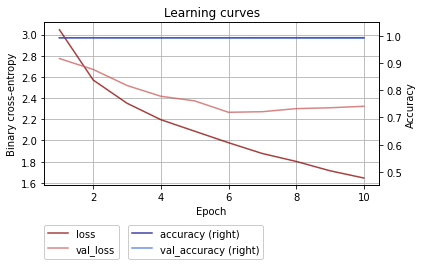

In [ ]:
# 4.
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist5.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.right_ax.set_ylim(0.45, 1.05)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()